# 라이브러리

In [2]:
import pandas as pd
import random
import os
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# 한글 폰트 깨짐 현상 해결을 위한 나눔 폰트 설치
# 코드 1회 실행 후 주석 처리하고 런타임 재시작 및 모두 실행
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [4]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

## 데이터 로드

In [5]:
# 경로 설정
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# csv 파일 읽어오기
root = '/content/drive/MyDrive/Project/'
C4_sungsan_depsouth = pd.read_csv(root + 'Data_sungsan_depsouth.csv')
C4_sungsan_depnorth = pd.read_csv(root + 'Data_sungsan_depnorth.csv')

In [7]:
# 데이터 확인
print(C4_sungsan_depsouth.info())
print(C4_sungsan_depnorth.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           26304 non-null  object 
 1   dow            26304 non-null  int64  
 2   time           26304 non-null  object 
 3   branch_name    26304 non-null  object 
 4   district_name  26304 non-null  object 
 5   branch_num     26304 non-null  object 
 6   dep_point      26304 non-null  object 
 7   arr_point      26304 non-null  object 
 8   lane           26304 non-null  int64  
 9   distance       26304 non-null  int64  
 10  volume         23982 non-null  float64
 11  speed          25820 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date  

In [8]:
# 결측치 확인
print(C4_sungsan_depsouth.isnull().sum())
print(C4_sungsan_depnorth.isnull().sum())

date                0
dow                 0
time                0
branch_name         0
district_name       0
branch_num          0
dep_point           0
arr_point           0
lane                0
distance            0
volume           2322
speed             484
dtype: int64
date                0
dow                 0
time                0
branch_name         0
district_name       0
branch_num          0
dep_point           0
arr_point           0
lane                0
distance            0
volume           2788
speed             484
dtype: int64


In [9]:
import copy

In [10]:
C4_depsouth_cp = copy.deepcopy(C4_sungsan_depsouth)
C4_depnorth_cp = copy.deepcopy(C4_sungsan_depnorth)

In [11]:
C4_depsouth_cp['datetime'] = C4_depsouth_cp['date'] + ' ' + C4_depsouth_cp['time']

In [12]:
C4_depsouth_cp = C4_depsouth_cp.drop(C4_depsouth_cp[['date', 'time']], axis=1)

# 결측치 처리 방법 (1) 선형보간법


In [13]:
C4_depsouth_cp['datetime'] = pd.to_datetime(C4_depsouth_cp['datetime'])

In [14]:
C4_depsouth_cp = C4_depsouth_cp.set_index('datetime')

In [20]:
a = C4_depsouth_cp['2020-01-01 01:00:00']['volume'] 
C4_depsouth_cp['2019-01-01 01:00:00']['volume']

datetime
2020-01-01 01:00:00    1981.0
Name: volume, dtype: float64

In [30]:
typeC_data_int = C4_depsouth_cp.interpolate(method = 'time', limit_direction='both')
round(typeC_data_int['volume'], 0)
typeC_data_int 

,dow,branch_name,district_name,branch_num,dep_point,arr_point,lane,distance,volume,speed
datetime,,,,,,,,,,
2019-01-01 01:00:00,2,성산대교,영등포구,C-04,성산대교남단,성산대교북단,3,1177,2742.0,60.80
2019-01-01 02:00:00,2,성산대교,영등포구,C-04,성산대교남단,성산대교북단,3,1177,2742.0,59.86
2019-01-01 03:00:00,2,성산대교,영등포구,C-04,성산대교남단,성산대교북단,3,1177,2742.0,62.31
2019-01-01 04:00:00,2,성산대교,영등포구,C-04,성산대교남단,성산대교북단,3,1177,2742.0,65.04
2019-01-01 05:00:00,2,성산대교,영등포구,C-04,성산대교남단,성산대교북단,3,1177,2742.0,64.03
...,...,...,...,...,...,...,...,...,...,...
2021-12-31 20:00:00,5,성산대교,영등포구,C-04,성산대교남단,성산대교북단,3,1177,3673.0,21.64
2021-12-31 21:00:00,5,성산대교,영등포구,C-04,성산대교남단,성산대교북단,3,1177,3894.0,30.72
2021-12-31 22:00:00,5,성산대교,영등포구,C-04,성산대교남단,성산대교북단,3,1177,4160.0,40.71


## 선형보간법으로 결측치 채운 데이터 시각화 및 계산

### 출발지가 행주대교 남단인 데이터 시각화

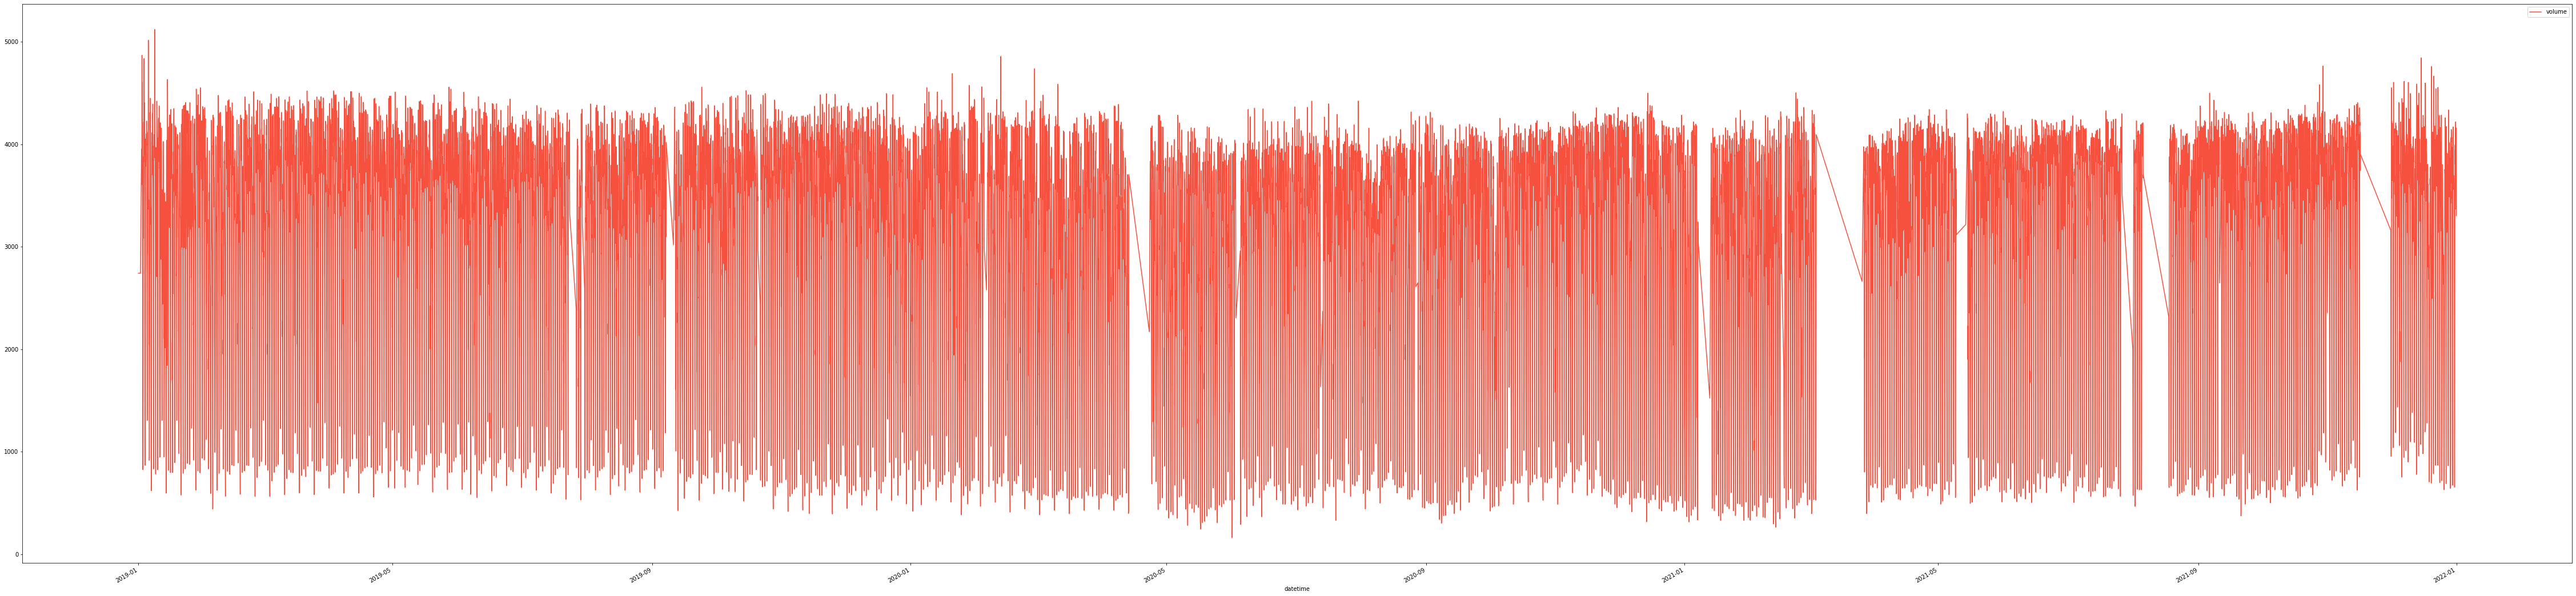

In [31]:
fig, axes = plt.subplots(1, figsize = (80,20))

typeC_data_int.plot( y = 'volume', ax = axes, alpha = 0.9, c = '#F53E2A')
  
plt.show()

In [ ]:
typeC_new_data_int[0].iloc[:, i+8:i+9].squeeze()

0        624.0
1        895.0
2        923.0
3       1115.0
4        801.0
         ...  
1091     817.0
1092     615.0
1093     608.0
1094     726.0
1095     654.0
Name: time_23, Length: 1096, dtype: float64

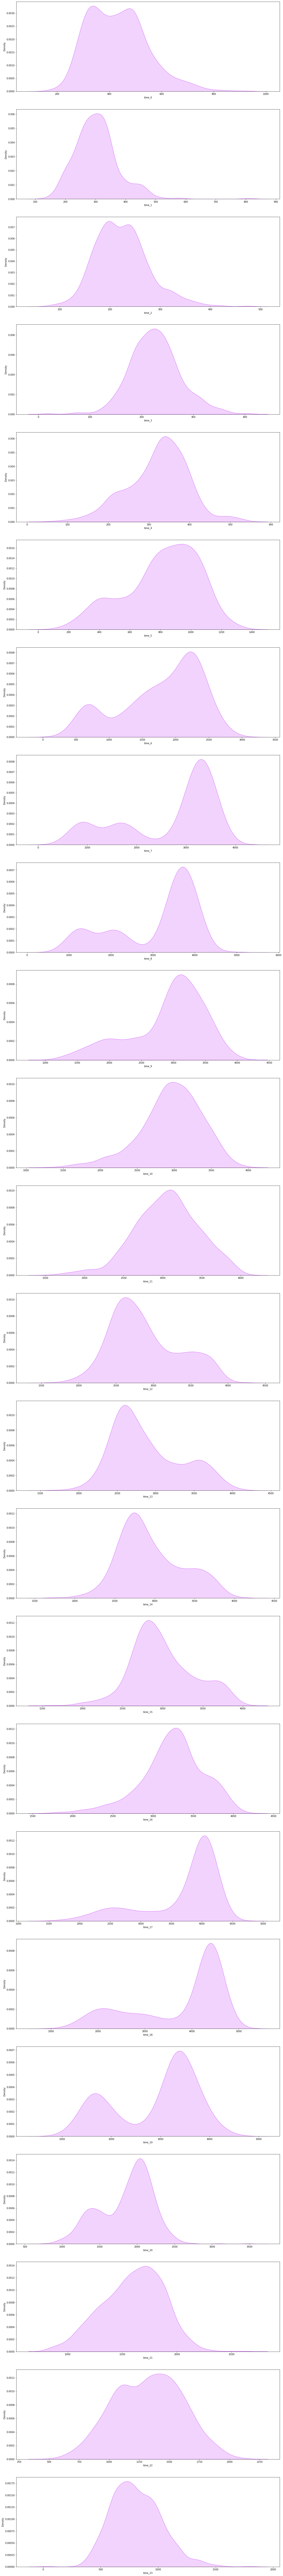

In [ ]:
fig, axes = plt.subplots(24, figsize = (20,200))

for e in range(0, 24):
      sns.kdeplot(typeC_new_data_int[0].iloc[:, e+8:e+9].squeeze(), shade = True, ax = axes[e], color = '#CD51FA')

plt.show()

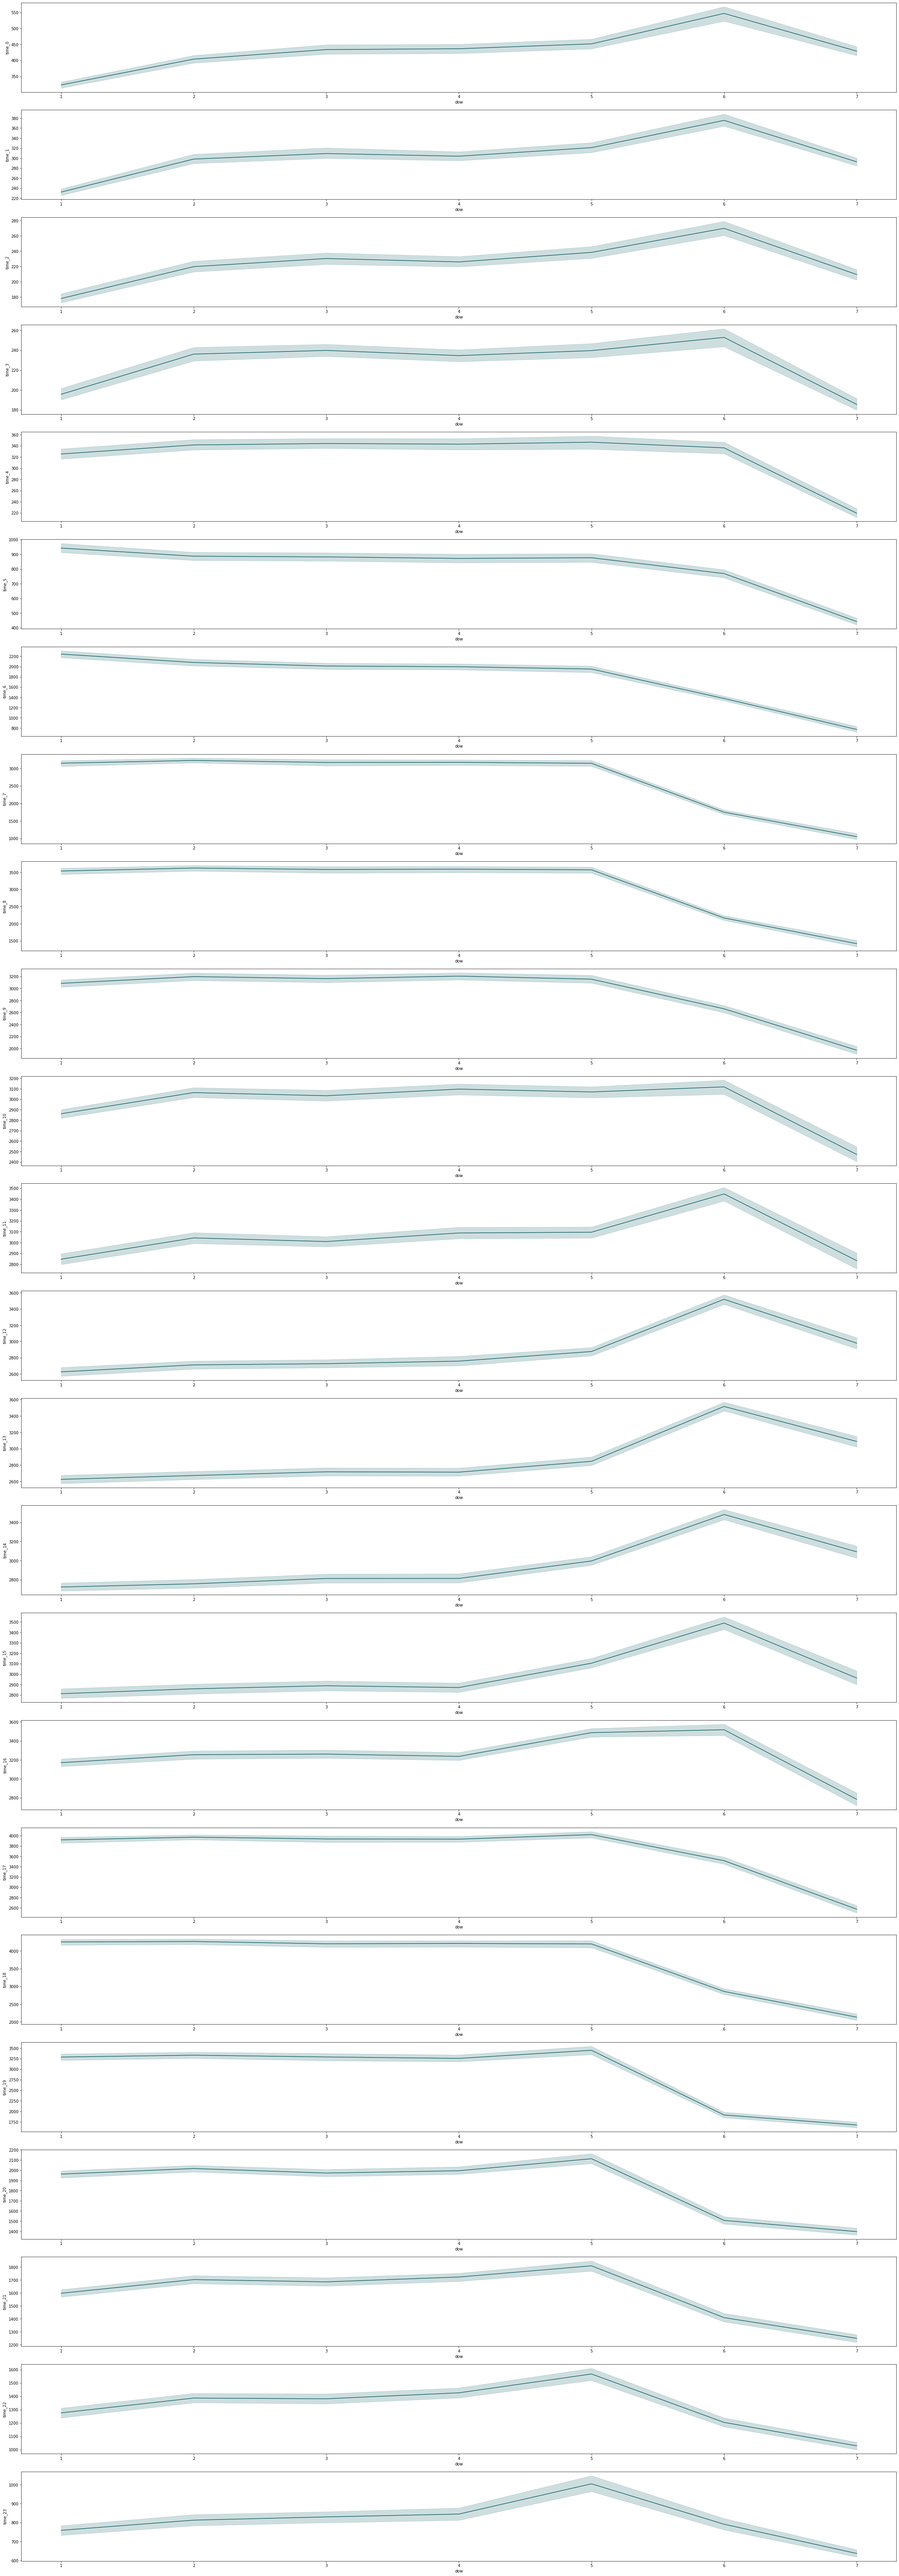

In [ ]:
fig, axes = plt.subplots(24, figsize = (40,120))

for m in range(0, 24):
  sns.lineplot(data = typeC_new_data_int[0], x='dow', y=typeC_new_data_int[0].iloc[:, m+8:m+9].squeeze(), ax=axes[m], color = '#0E5D61')

plt.show()

### 출발지점 별 시간 데이터 추출

In [ ]:
typeC_int_newdata = []
for i in range(0, len(typeC_int_dp_list)) : 
  typeC_data_int_temp = typeC_data_int.loc[typeC_data_int.dep_point == typeC_int_dp_list[i]]
  typeC_data_int_time = typeC_data_int_temp.iloc[:, 8:32]
  typeC_int_newdata.append(typeC_data_int_time)

In [ ]:
typeC_int_newdata[39]

,time_0,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,...,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21,time_22,time_23
42744,86.0,120.0,79.0,72.0,51.0,51.0,116.0,177.0,224.0,189.0,...,299.0,314.0,288.0,268.0,210.0,196.0,180.0,155.0,145.0,83.0
42745,64.0,55.0,52.0,28.0,37.0,74.0,154.0,293.0,508.0,429.0,...,354.0,391.0,410.0,484.0,498.0,363.0,264.0,217.0,164.0,101.0
42746,94.0,84.0,75.0,70.0,53.0,93.0,163.0,330.0,537.0,468.0,...,408.0,397.0,460.0,502.0,498.0,375.0,265.0,245.0,190.0,146.0
42747,96.0,93.0,90.0,93.0,50.0,91.0,159.0,315.0,468.0,446.0,...,414.0,437.0,448.0,570.0,530.0,418.0,319.0,231.0,217.0,159.0
42748,80.0,93.0,109.0,69.0,69.0,83.0,140.0,183.0,306.0,352.0,...,534.0,494.0,476.0,479.0,393.0,266.0,284.0,240.0,222.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43835,49.0,27.0,26.0,25.0,37.0,91.0,162.0,316.0,512.0,448.0,...,408.0,428.0,504.0,535.0,464.0,296.0,207.0,178.0,115.0,79.0
43836,63.0,32.0,28.0,21.0,41.0,90.0,178.0,288.0,561.0,490.0,...,385.0,434.0,488.0,496.0,535.0,302.0,245.0,211.0,115.0,68.0
43837,60.0,33.0,46.0,34.0,45.0,86.0,182.0,288.0,576.0,410.0,...,388.0,438.0,471.0,498.0,522.0,356.0,231.0,209.0,117.0,86.0
43838,51.0,30.0,34.0,22.0,35.0,96.0,153.0,296.0,581.0,502.0,...,463.0,558.0,653.0,625.0,606.0,385.0,281.0,214.0,129.0,82.0


### 출발지점 및 시간 별 통행량 합계

In [ ]:
typeC_int_sum = []
for r in range(0, len(typeC_int_dp_list)) :
  typeC_int_data_sum = typeC_int_newdata[r].sum()
  typeC_int_sum.append(typeC_int_data_sum)

In [ ]:
typeC_int_sum[0]

time_0      473630.0
time_1      333936.0
time_2      246019.0
time_3      248041.0
time_4      353276.0
time_5      887866.0
time_6     1946323.0
time_7     2923219.0
time_8     3365440.0
time_9     3200514.0
time_10    3243104.0
time_11    3344913.0
time_12    3162684.0
time_13    3159627.0
time_14    3237891.0
time_15    3286155.0
time_16    3556204.0
time_17    4050337.0
time_18    4089962.0
time_19    3163222.0
time_20    2029354.0
time_21    1750084.0
time_22    1451347.0
time_23     889340.0
dtype: float64

### 출발지점 별 통행량 합계

In [ ]:
typeC_int_total = []
for e in range(0,len(typeC_int_dp_list)) :
  typeC_int_total_sum = typeC_int_sum[e].sum()
  typeC_int_total.append(typeC_int_total_sum)

In [ ]:
print(max(typeC_int_total))
print(typeC_int_total.index(max(typeC_int_total)))
# 한남대교 남단 출발이 최대

101543367.0
22


### 다리 별 통행량 합계

In [ ]:
typeC_int_bn_total = []
for o in range(0, len(typeC_int_dp_list)) :
  if o % 2 == 0 :
    typeC_bn_total_sum_int = typeC_int_total[o] + typeC_int_total[o+1]
    typeC_int_bn_total.append(typeC_bn_total_sum_int)

In [ ]:
typeC_int_bn_total[11]

201226182.0

In [ ]:
typeC_int_bn_total[12]

76229169.0

In [ ]:
typeC_int_bn_total[13]

138173359.0

In [ ]:
typeC_int_bn_total[3]

146530187.0

In [ ]:
print(max(typeC_int_bn_total))
print(typeC_int_bn_total.index(max(typeC_int_bn_total)))
# 한남대교 통행량이 최대

201226182.0
11


# 결측치 처리 방법 (2) K-nn imputer


In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
new_df_time = typeC_data.iloc[:, 8:32]
new_df_time

,time_0,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,...,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21,time_22,time_23
0,NaN,819.0,386.0,257.0,249.0,434.0,765.0,792.0,1412.0,1311.0,...,2909.0,2742.0,2562.0,2411.0,2028.0,1528.0,1312.0,1145.0,985.0,624.0
1,297.0,184.0,138.0,149.0,283.0,813.0,1876.0,3224.0,3961.0,3193.0,...,2751.0,2626.0,2992.0,3792.0,4362.0,3599.0,1902.0,1563.0,1273.0,895.0
2,446.0,318.0,215.0,224.0,339.0,779.0,1788.0,3302.0,4044.0,3423.0,...,2700.0,2595.0,2952.0,3928.0,4463.0,3316.0,1938.0,1768.0,1461.0,923.0
3,469.0,301.0,201.0,251.0,359.0,766.0,1640.0,3349.0,3875.0,3258.0,...,2785.0,2856.0,3298.0,4042.0,4506.0,3872.0,1982.0,1741.0,1629.0,1115.0
4,611.0,412.0,301.0,272.0,364.0,647.0,1229.0,1587.0,2006.0,2305.0,...,3508.0,3556.0,3818.0,3720.0,2814.0,1884.0,1415.0,1386.0,1248.0,801.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43835,49.0,27.0,26.0,25.0,37.0,91.0,162.0,316.0,512.0,448.0,...,408.0,428.0,504.0,535.0,464.0,296.0,207.0,178.0,115.0,79.0
43836,63.0,32.0,28.0,21.0,41.0,90.0,178.0,288.0,561.0,490.0,...,385.0,434.0,488.0,496.0,535.0,302.0,245.0,211.0,115.0,68.0
43837,60.0,33.0,46.0,34.0,45.0,86.0,182.0,288.0,576.0,410.0,...,388.0,438.0,471.0,498.0,522.0,356.0,231.0,209.0,117.0,86.0
43838,51.0,30.0,34.0,22.0,35.0,96.0,153.0,296.0,581.0,502.0,...,463.0,558.0,653.0,625.0,606.0,385.0,281.0,214.0,129.0,82.0


In [ ]:
new_df_nottime = typeC_data.iloc[:, :8]
new_df_nottime

,datetime,dow,branch_name,district_name,lane,branch_num,dep_point,arr_point
0,2019-01-01,2,행주대교,강서구,3,C-01,행주대교남단,행주대교북단
1,2019-01-02,3,행주대교,강서구,3,C-01,행주대교남단,행주대교북단
2,2019-01-03,4,행주대교,강서구,3,C-01,행주대교남단,행주대교북단
3,2019-01-04,5,행주대교,강서구,3,C-01,행주대교남단,행주대교북단
4,2019-01-05,6,행주대교,강서구,3,C-01,행주대교남단,행주대교북단
...,...,...,...,...,...,...,...,...
43835,2021-12-27,1,광진교,강동구,1,C-21,광진교북단,광진교남단
43836,2021-12-28,2,광진교,강동구,1,C-21,광진교북단,광진교남단
43837,2021-12-29,3,광진교,강동구,1,C-21,광진교북단,광진교남단
43838,2021-12-30,4,광진교,강동구,1,C-21,광진교북단,광진교남단


In [ ]:
imputer_3 = KNNImputer(n_neighbors = 3)
imputed_3 = imputer_3.fit_transform(new_df_time)
typeC_data_knn_n3 = pd.DataFrame(imputed_3, columns=new_df_time.columns)
typeC_data_knn_n3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43840 entries, 0 to 43839
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time_0   43840 non-null  float64
 1   time_1   43840 non-null  float64
 2   time_2   43840 non-null  float64
 3   time_3   43840 non-null  float64
 4   time_4   43840 non-null  float64
 5   time_5   43840 non-null  float64
 6   time_6   43840 non-null  float64
 7   time_7   43840 non-null  float64
 8   time_8   43840 non-null  float64
 9   time_9   43840 non-null  float64
 10  time_10  43840 non-null  float64
 11  time_11  43840 non-null  float64
 12  time_12  43840 non-null  float64
 13  time_13  43840 non-null  float64
 14  time_14  43840 non-null  float64
 15  time_15  43840 non-null  float64
 16  time_16  43840 non-null  float64
 17  time_17  43840 non-null  float64
 18  time_18  43840 non-null  float64
 19  time_19  43840 non-null  float64
 20  time_20  43840 non-null  float64
 21  time_21  438

In [ ]:
imputer_5 = KNNImputer(n_neighbors = 5)
imputed_5 = imputer_5.fit_transform(new_df_time)
typeC_data_knn_n5 = pd.DataFrame(imputed_5, columns=new_df_time.columns)
typeC_data_knn_n5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43840 entries, 0 to 43839
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time_0   43840 non-null  float64
 1   time_1   43840 non-null  float64
 2   time_2   43840 non-null  float64
 3   time_3   43840 non-null  float64
 4   time_4   43840 non-null  float64
 5   time_5   43840 non-null  float64
 6   time_6   43840 non-null  float64
 7   time_7   43840 non-null  float64
 8   time_8   43840 non-null  float64
 9   time_9   43840 non-null  float64
 10  time_10  43840 non-null  float64
 11  time_11  43840 non-null  float64
 12  time_12  43840 non-null  float64
 13  time_13  43840 non-null  float64
 14  time_14  43840 non-null  float64
 15  time_15  43840 non-null  float64
 16  time_16  43840 non-null  float64
 17  time_17  43840 non-null  float64
 18  time_18  43840 non-null  float64
 19  time_19  43840 non-null  float64
 20  time_20  43840 non-null  float64
 21  time_21  438

In [ ]:
imputer_8 = KNNImputer(n_neighbors = 8)
imputed_8 = imputer_8.fit_transform(new_df_time)
typeC_data_knn_n8 = pd.DataFrame(imputed_8, columns=new_df_time.columns)
typeC_data_knn_n8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43840 entries, 0 to 43839
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time_0   43840 non-null  float64
 1   time_1   43840 non-null  float64
 2   time_2   43840 non-null  float64
 3   time_3   43840 non-null  float64
 4   time_4   43840 non-null  float64
 5   time_5   43840 non-null  float64
 6   time_6   43840 non-null  float64
 7   time_7   43840 non-null  float64
 8   time_8   43840 non-null  float64
 9   time_9   43840 non-null  float64
 10  time_10  43840 non-null  float64
 11  time_11  43840 non-null  float64
 12  time_12  43840 non-null  float64
 13  time_13  43840 non-null  float64
 14  time_14  43840 non-null  float64
 15  time_15  43840 non-null  float64
 16  time_16  43840 non-null  float64
 17  time_17  43840 non-null  float64
 18  time_18  43840 non-null  float64
 19  time_19  43840 non-null  float64
 20  time_20  43840 non-null  float64
 21  time_21  438

In [ ]:
imputer_2000 = KNNImputer(n_neighbors = 2000)
imputed_2000 = imputer_2000.fit_transform(new_df_time)
typeC_data_knn_n2000 = pd.DataFrame(imputed_2000, columns=new_df_time.columns)
typeC_data_knn_n2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43840 entries, 0 to 43839
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time_0   43840 non-null  float64
 1   time_1   43840 non-null  float64
 2   time_2   43840 non-null  float64
 3   time_3   43840 non-null  float64
 4   time_4   43840 non-null  float64
 5   time_5   43840 non-null  float64
 6   time_6   43840 non-null  float64
 7   time_7   43840 non-null  float64
 8   time_8   43840 non-null  float64
 9   time_9   43840 non-null  float64
 10  time_10  43840 non-null  float64
 11  time_11  43840 non-null  float64
 12  time_12  43840 non-null  float64
 13  time_13  43840 non-null  float64
 14  time_14  43840 non-null  float64
 15  time_15  43840 non-null  float64
 16  time_16  43840 non-null  float64
 17  time_17  43840 non-null  float64
 18  time_18  43840 non-null  float64
 19  time_19  43840 non-null  float64
 20  time_20  43840 non-null  float64
 21  time_21  438

In [ ]:
typeC_data_knn = pd.concat([new_df_nottime, typeC_data_knn_n400], axis = 1)
typeC_data_knn = round(typeC_data_knn, 0)
typeC_data_knn

,datetime,dow,branch_name,district_name,lane,branch_num,dep_point,arr_point,time_0,time_1,...,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21,time_22,time_23
0,2019-01-01,2,행주대교,강서구,3,C-01,행주대교남단,행주대교북단,617.0,819.0,...,2909.0,2742.0,2562.0,2411.0,2028.0,1528.0,1312.0,1145.0,985.0,624.0
1,2019-01-02,3,행주대교,강서구,3,C-01,행주대교남단,행주대교북단,297.0,184.0,...,2751.0,2626.0,2992.0,3792.0,4362.0,3599.0,1902.0,1563.0,1273.0,895.0
2,2019-01-03,4,행주대교,강서구,3,C-01,행주대교남단,행주대교북단,446.0,318.0,...,2700.0,2595.0,2952.0,3928.0,4463.0,3316.0,1938.0,1768.0,1461.0,923.0
3,2019-01-04,5,행주대교,강서구,3,C-01,행주대교남단,행주대교북단,469.0,301.0,...,2785.0,2856.0,3298.0,4042.0,4506.0,3872.0,1982.0,1741.0,1629.0,1115.0
4,2019-01-05,6,행주대교,강서구,3,C-01,행주대교남단,행주대교북단,611.0,412.0,...,3508.0,3556.0,3818.0,3720.0,2814.0,1884.0,1415.0,1386.0,1248.0,801.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43835,2021-12-27,1,광진교,강동구,1,C-21,광진교북단,광진교남단,49.0,27.0,...,408.0,428.0,504.0,535.0,464.0,296.0,207.0,178.0,115.0,79.0
43836,2021-12-28,2,광진교,강동구,1,C-21,광진교북단,광진교남단,63.0,32.0,...,385.0,434.0,488.0,496.0,535.0,302.0,245.0,211.0,115.0,68.0
43837,2021-12-29,3,광진교,강동구,1,C-21,광진교북단,광진교남단,60.0,33.0,...,388.0,438.0,471.0,498.0,522.0,356.0,231.0,209.0,117.0,86.0
43838,2021-12-30,4,광진교,강동구,1,C-21,광진교북단,광진교남단,51.0,30.0,...,463.0,558.0,653.0,625.0,606.0,385.0,281.0,214.0,129.0,82.0


In [ ]:
typeC_data_knn['datetime'] = pd.to_datetime(typeC_data_knn['datetime'])
typeC_data_knn

,datetime,dow,branch_name,district_name,lane,branch_num,dep_point,arr_point,time_0,time_1,...,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21,time_22,time_23
0,2019-01-01,2,행주대교,강서구,3,C-01,행주대교남단,행주대교북단,617.0,819.0,...,2909.0,2742.0,2562.0,2411.0,2028.0,1528.0,1312.0,1145.0,985.0,624.0
1,2019-01-02,3,행주대교,강서구,3,C-01,행주대교남단,행주대교북단,297.0,184.0,...,2751.0,2626.0,2992.0,3792.0,4362.0,3599.0,1902.0,1563.0,1273.0,895.0
2,2019-01-03,4,행주대교,강서구,3,C-01,행주대교남단,행주대교북단,446.0,318.0,...,2700.0,2595.0,2952.0,3928.0,4463.0,3316.0,1938.0,1768.0,1461.0,923.0
3,2019-01-04,5,행주대교,강서구,3,C-01,행주대교남단,행주대교북단,469.0,301.0,...,2785.0,2856.0,3298.0,4042.0,4506.0,3872.0,1982.0,1741.0,1629.0,1115.0
4,2019-01-05,6,행주대교,강서구,3,C-01,행주대교남단,행주대교북단,611.0,412.0,...,3508.0,3556.0,3818.0,3720.0,2814.0,1884.0,1415.0,1386.0,1248.0,801.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43835,2021-12-27,1,광진교,강동구,1,C-21,광진교북단,광진교남단,49.0,27.0,...,408.0,428.0,504.0,535.0,464.0,296.0,207.0,178.0,115.0,79.0
43836,2021-12-28,2,광진교,강동구,1,C-21,광진교북단,광진교남단,63.0,32.0,...,385.0,434.0,488.0,496.0,535.0,302.0,245.0,211.0,115.0,68.0
43837,2021-12-29,3,광진교,강동구,1,C-21,광진교북단,광진교남단,60.0,33.0,...,388.0,438.0,471.0,498.0,522.0,356.0,231.0,209.0,117.0,86.0
43838,2021-12-30,4,광진교,강동구,1,C-21,광진교북단,광진교남단,51.0,30.0,...,463.0,558.0,653.0,625.0,606.0,385.0,281.0,214.0,129.0,82.0


## knn imputation으로 결측치 채운 데이터 시각화 및 계산

### 출발지점 리스트로 추출

In [ ]:
typeC_knn_bn_dp = typeC_data_knn[['branch_num', 'dep_point']]                
typeC_knn_bn_dp = typeC_knn_bn_dp.drop_duplicates(['dep_point'], ignore_index = True)

new_row_knn = pd.DataFrame([['C-12', '반포대교남단']], columns = typeC_knn_bn_dp.columns)
typeC_knn_bn_dp = pd.concat([typeC_knn_bn_dp.iloc[:21], new_row_knn, typeC_knn_bn_dp.iloc[21:]], ignore_index = True)

typeC_knn_dp_list = typeC_knn_bn_dp['dep_point'].tolist()
typeC_knn_dp_list

['행주대교남단',
 '행주대교북단',
 '가양대교남단',
 '가양대교북단',
 '성산대교남단',
 '성산대교북단',
 '양화대교남단',
 '양화대교북단',
 '서강대교남단',
 '서강대교북단',
 '마포대교남단',
 '마포대교북단',
 '원효대교남단',
 '원효대교북단',
 '한강대교남단',
 '한강대교북단',
 '동작대교남단',
 '동작대교북단',
 '반포대교남단',
 '반포대교북단',
 '반포고가차도',
 '반포대교남단',
 '한남대교남단',
 '한남대교북단',
 '동호대교남단',
 '동호대교북단',
 '성수대교남단',
 '성수대교북단',
 '영동대교남단',
 '영동대교북단',
 '청담대교남단',
 '청담대교북단',
 '잠실대교남단',
 '잠실대교북단',
 '올림픽대교남단',
 '올림픽대교북단',
 '천호대교남단',
 '천호대교북단',
 '광진교남단',
 '광진교북단']

### 출발지점 별 데이터 추출

In [ ]:
typeC_new_data_knn = []
for i in range(0, len(typeC_knn_dp_list)) : 
  typeC_data_knn_temp = typeC_data_knn.loc[typeC_data_knn.dep_point == typeC_knn_dp_list[i]]
  typeC_new_data_knn.append(typeC_data_knn_temp)

In [ ]:
typeC_new_data_knn[0].iloc[:, 31:32].columns

Index(['time_23'], dtype='object')

### 출발지가 행주대교 남단인 데이터 시각화

In [ ]:
fig, axes = plt.subplots(24, figsize = (50,120))

for i in range(0, 24):

  typeC_new_data_knn[0].plot(x = 'datetime', y = typeC_new_data_knn[0].iloc[:, i+8:i+9].columns, ax = axes[i], alpha = 0.9, c = '#F53E2A')
  
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
typeC_data_knn.to_csv('typeC_data_knn.csv', encoding = 'utf-8', index=False)